In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import normaltest, anderson
from sklearn.compose import ColumnTransformer
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [2]:
#cargar el data set
aus = pd.read_csv('train-rain.csv')

# Exploración de Datos

In [3]:
aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141194 entries, 0 to 141193
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           141194 non-null  object 
 1   Location       141194 non-null  object 
 2   MinTemp        139757 non-null  float64
 3   MaxTemp        139976 non-null  float64
 4   Rainfall       138032 non-null  float64
 5   Evaporation    80180 non-null   float64
 6   Sunshine       73346 non-null   float64
 7   WindGustDir    131185 non-null  object 
 8   WindGustSpeed  131248 non-null  float64
 9   WindDir9am     130929 non-null  object 
 10  WindDir3pm     137085 non-null  object 
 11  WindSpeed9am   139484 non-null  float64
 12  WindSpeed3pm   138221 non-null  float64
 13  Humidity9am    138616 non-null  float64
 14  Humidity3pm    136794 non-null  float64
 15  Pressure9am    126569 non-null  float64
 16  Pressure3pm    126600 non-null  float64
 17  Cloud9am       86911 non-null

In [5]:
aus.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,139757.000000,139976.000000,138032.000000,80180.000000,73346.000000,131248.000000,139484.000000,138221.000000,138616.000000,136794.000000,126569.000000,126600.000000,86911.000000,83503.000000,139482.000000,137674.000000
mean,12.198725,23.222497,2.360488,5.466366,7.608249,40.029814,14.035832,18.655978,68.886247,51.549439,1017.649744,1015.255033,4.448919,4.511670,16.994266,21.683567
std,6.397990,7.121939,8.485090,4.194826,3.786612,13.598773,8.910200,8.805227,19.024595,20.796737,7.101834,7.032827,2.886817,2.719796,6.489244,6.938779
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [6]:
aus.isnull().sum()

Date                 0
Location             0
MinTemp           1437
MaxTemp           1218
Rainfall          3162
Evaporation      61014
Sunshine         67848
WindGustDir      10009
WindGustSpeed     9946
WindDir9am       10265
WindDir3pm        4109
WindSpeed9am      1710
WindSpeed3pm      2973
Humidity9am       2578
Humidity3pm       4400
Pressure9am      14625
Pressure3pm      14594
Cloud9am         54283
Cloud3pm         57691
Temp9am           1712
Temp3pm           3520
RainToday         3162
RainTomorrow      3160
dtype: int64

In [7]:
df = aus 
#Calcular la frecuencia de cada ubicación
location_counts = df['Location'].value_counts()

#Obtener los tres lugares con mayor frecuencia
top_5_locations = location_counts.head(5)

#Mostrar los tres lugares con mayor frecuencia
print("Top 5 lugares con mayor frecuencia:")
print(top_5_locations)


Top 5 lugares con mayor frecuencia:
Location
Canberra     3318
Sydney       3228
Hobart       3113
Brisbane     3104
Melbourne    3101
Name: count, dtype: int64


In [8]:
#Calcular la suma de lluvia por ubicación
rain_by_location = df.groupby('Location')['Rainfall'].sum().sort_values(ascending=False)

#Mostrar la ubicación con la mayor cantidad de lluvia
print("Ubicación con más lluvia:")
print(rain_by_location.head(1))

Ubicación con más lluvia:
Location
Cairns    16429.0
Name: Rainfall, dtype: float64


In [9]:

df_month = df
#convertir la columna 'Date' a tipo datetime para trabajar con fechas
df_month['Date'] = pd.to_datetime(df_month['Date'])

#Extraer el mes de cada fecha
df_month['Month'] = df_month['Date'].dt.month

#Calcular la suma de lluvia por mes
rain_by_month = df_month.groupby('Month')['Rainfall'].sum().sort_values(ascending=False)

#Obtener los tres meses con mayor cantidad de lluvia
top_three_months = rain_by_month.head(3)

#Mostrar los top tres meses y su cantidad de lluvia
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
for month, rainfall in top_three_months.items():
    print(f"{month_names[month-1]}: {rainfall} mm")

Marzo: 35669.8 mm
Enero: 34483.4 mm
Junio: 33275.2 mm


In [10]:
#Create a DataFrame from the sample data
df = pd.DataFrame(aus)
#Obtener la fecha más antigua y la más reciente
fecha_mas_antigua = df['Date'].min()
fecha_mas_reciente = df['Date'].max()

print("Fecha más antigua:", fecha_mas_antigua)
print("Fecha más reciente:", fecha_mas_reciente)

Fecha más antigua: 2007-11-01 00:00:00
Fecha más reciente: 2017-06-25 00:00:00


In [11]:
#Obtener el número de observaciones (filas) y columnas
num_filas, num_columnas = df.shape
print(f"El DataFrame tiene {num_filas} observaciones y {num_columnas} columnas.")

El DataFrame tiene 141194 observaciones y 24 columnas.


In [12]:
#Convierte la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

#Luego puedes calcular la suma de la lluvia por año
rainfall_by_year = df.groupby(df['Date'].dt.year)['Rainfall'].sum()

#Obtener los tres años con mayor cantidad de lluvia
top_3_years_rainfall = rainfall_by_year.nlargest(3)

#Mostrar los top 3 años de lluvia
print("Top 3 años con mayor cantidad de lluvia:")
print(top_3_years_rainfall)

Top 3 años con mayor cantidad de lluvia:
Date
2010    43026.0
2011    41634.4
2016    40557.2
Name: Rainfall, dtype: float64


In [13]:
#Calcular la frecuencia de direcciones de viento a las 9 am (WindDir9am)
wind_dir_9am_counts = df['WindDir9am'].value_counts()
top_wind_dir_9am = wind_dir_9am_counts.idxmax()  

#Calcular la frecuencia de direcciones de viento a las 3 pm (WindDir3pm)
wind_dir_3pm_counts = df['WindDir3pm'].value_counts()
top_wind_dir_3pm = wind_dir_3pm_counts.idxmax() 

#Mostrar las direcciones más frecuentes a las 9 am y 3 pm
print("Dirección de viento más frecuente a las 9 am:", top_wind_dir_9am)
print("Dirección de viento más frecuente a las 3 pm:", top_wind_dir_3pm)


Dirección de viento más frecuente a las 9 am: N
Dirección de viento más frecuente a las 3 pm: SE


In [14]:
#Contar las instancias para cada clase en la variable objetivo
class_counts = aus['RainTomorrow'].value_counts()

print("Balance de clases en la variable objetivo:")
print(class_counts)

Balance de clases en la variable objetivo:
RainTomorrow
No     107093
Yes     30941
Name: count, dtype: int64


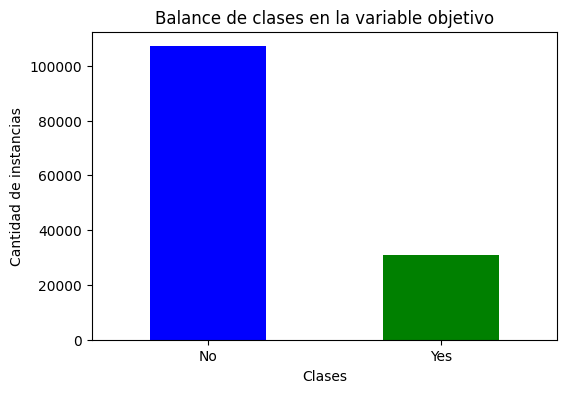

In [36]:
# Contar las instancias para cada clase en la variable objetivo
class_counts = aus['RainTomorrow'].value_counts()

# Graficar el balance de clases
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Balance de clases en la variable objetivo')
plt.xlabel('Clases')
plt.ylabel('Cantidad de instancias')
plt.xticks(rotation=0)
plt.show()


## Test de Normalidad

In [15]:
#Iterar a través de las columnas numéricas y realizar el test de normalidad
for col in aus.select_dtypes(include='number').columns:
    print(f"\nNormality test results for {col}:")
    
    #Test de D'Agostino's K^2
    _, p_normaltest = normaltest(aus[col].dropna())  # Eliminar valores NaN antes de la prueba
    print(f"D'Agostino's K^2 Test p-value: {p_normaltest}")
    
    #Test de Anderson-Darling
    result_anderson = anderson(aus[col].dropna())
    print(f"Anderson-Darling Test Statistic: {result_anderson.statistic}")
    print(f"Anderson-Darling Critical Values: {result_anderson.critical_values}")


Normality test results for MinTemp:
D'Agostino's K^2 Test p-value: 0.0
Anderson-Darling Test Statistic: 127.3227805578208
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]

Normality test results for MaxTemp:
D'Agostino's K^2 Test p-value: 0.0
Anderson-Darling Test Statistic: 403.1513569246745
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]

Normality test results for Rainfall:
D'Agostino's K^2 Test p-value: 0.0
Anderson-Darling Test Statistic: 33148.72534913375
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]

Normality test results for Evaporation:
D'Agostino's K^2 Test p-value: 0.0
Anderson-Darling Test Statistic: 1959.6607396240433
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]

Normality test results for Sunshine:
D'Agostino's K^2 Test p-value: 0.0
Anderson-Darling Test Statistic: 1258.0453269564314
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]

Normality test results for WindGustSpeed:
D'Ag

In [16]:
df_unique = df.drop_duplicates()

print("DataFrame sin duplicados:")
print(df_unique)

DataFrame sin duplicados:
             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
141189 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
141190 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
141191 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
141192 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
141193 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

 

## VIF

# Visualización de Datos

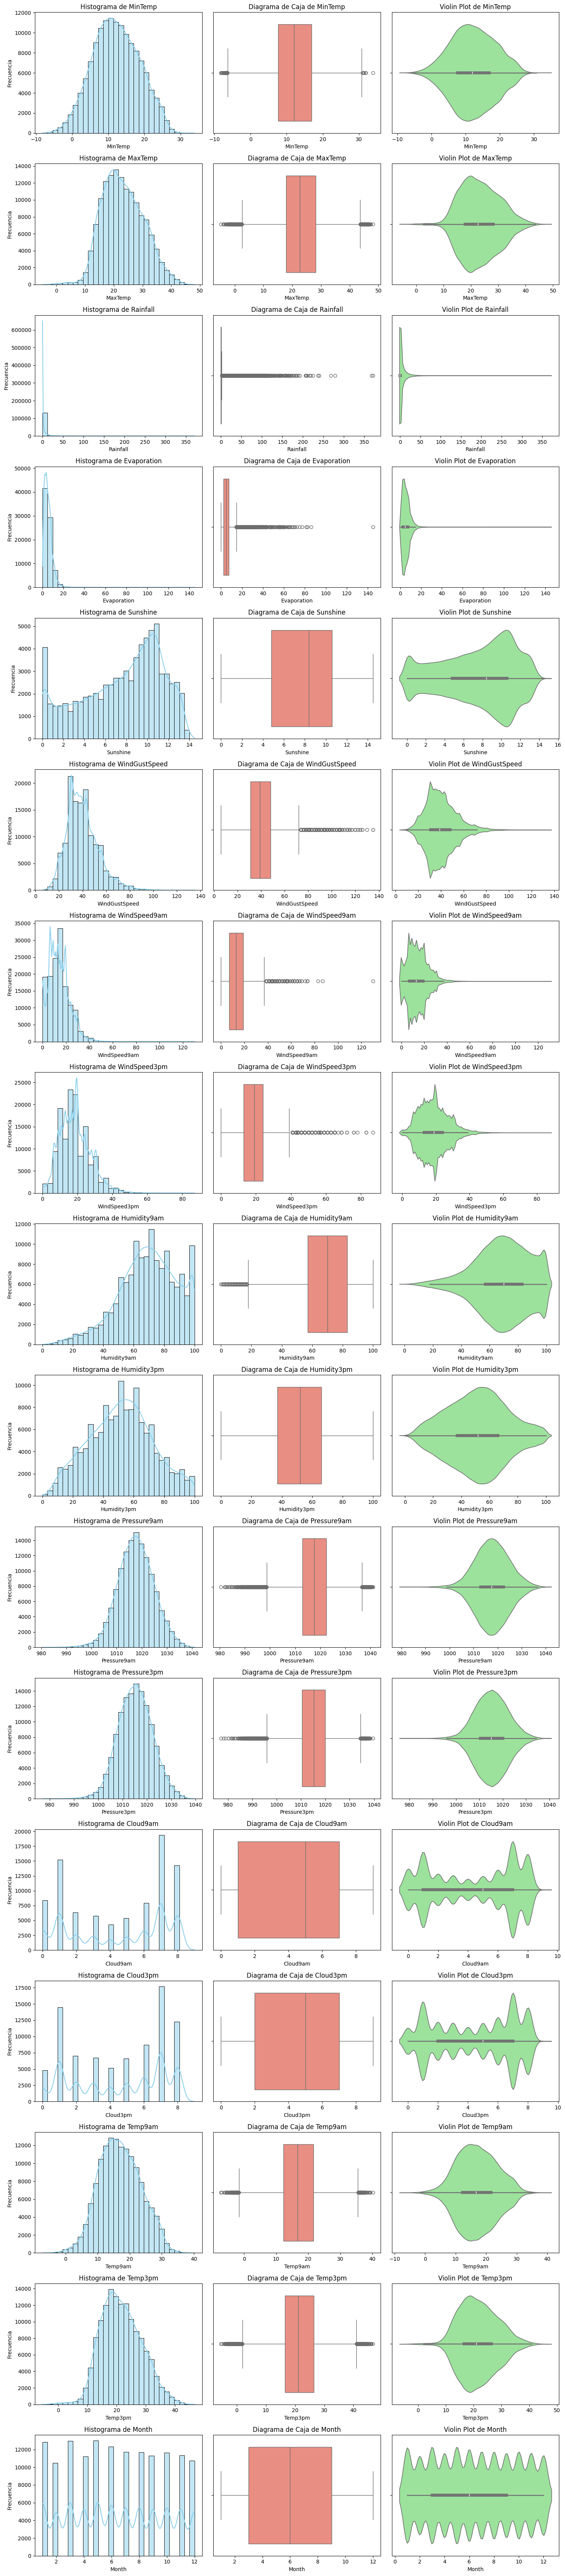

In [17]:
data = aus
#Crear la figura y los ejes
fig, axes = plt.subplots(nrows=len(data.select_dtypes(include=[np.number]).columns), ncols=3, figsize=(15, 4*len(data.select_dtypes(include=[np.number]).columns)))

#Iterar a través de las columnas numéricas y crear las gráficas
for idx, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    #Histograma
    sns.histplot(data[column], bins=30, kde=True, color='skyblue', ax=axes[idx][0])
    axes[idx][0].set_xlabel(column)
    axes[idx][0].set_ylabel('Frecuencia')
    axes[idx][0].set_title(f'Histograma de {column}')
    
    #Diagrama de caja (Box plot)
    sns.boxplot(x=data[column], color='salmon', ax=axes[idx][1])
    axes[idx][1].set_xlabel(column)
    axes[idx][1].set_title(f'Diagrama de Caja de {column}')
    
    #Violin plot
    sns.violinplot(x=data[column], color='lightgreen', ax=axes[idx][2])
    axes[idx][2].set_xlabel(column)
    axes[idx][2].set_title(f'Violin Plot de {column}')

plt.tight_layout()
plt.show()

## Temporalidad

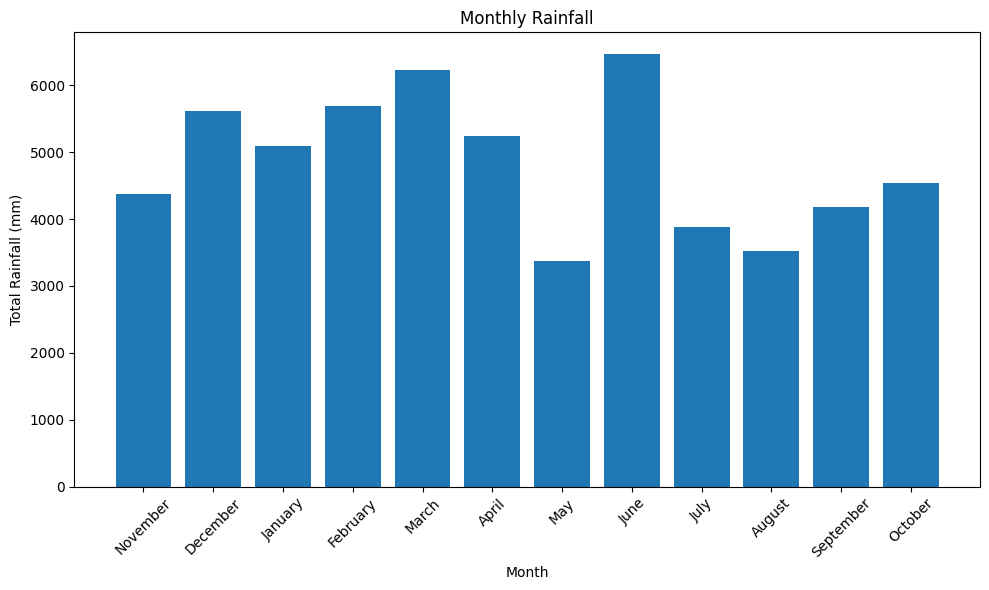

In [18]:
#Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

#Set 'Date' column as the index
df.set_index('Date', inplace=True)

#Ensure the index is of type DatetimeIndex
df.index = pd.to_datetime(df.index)

#Aggregate rainfall data by month
monthly_rainfall = df.resample('M').sum()

#Plot the monthly rainfall
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall.index.month_name(), monthly_rainfall['Rainfall'])
plt.title('Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

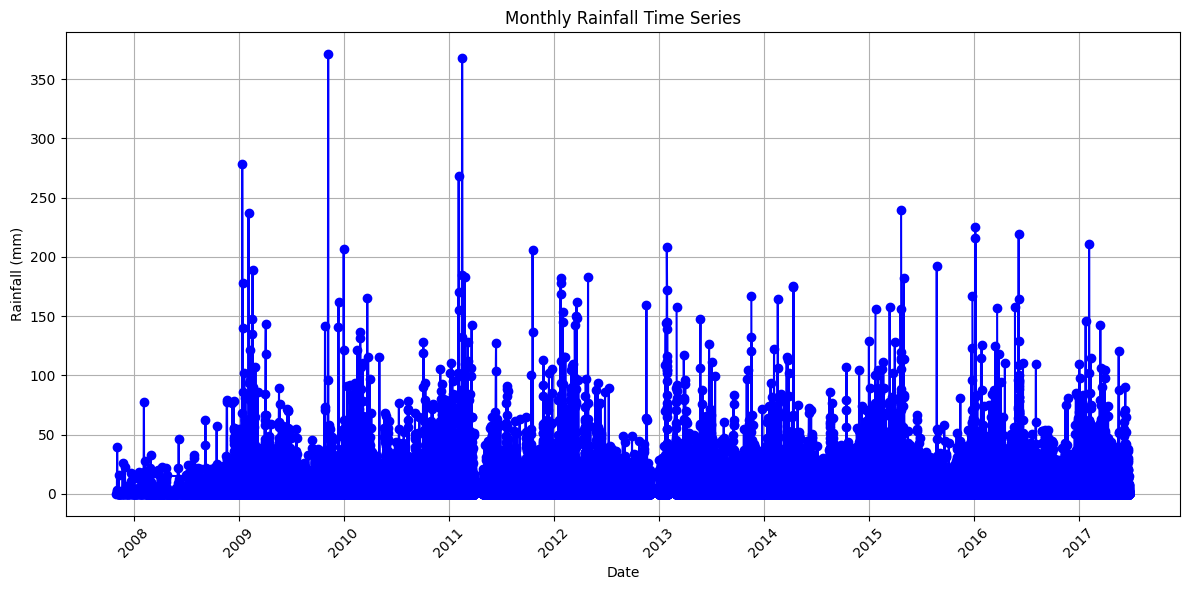

In [19]:
#Create a DataFrame from the sample data
df = pd.DataFrame(aus)
#Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

#Set 'Date' column as the index
df.set_index('Date', inplace=True)

#Ensure the index is of type DatetimeIndex
df.index = pd.to_datetime(df.index)

#Plot the time series of monthly rainfall
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall'], marker='o', linestyle='-', color='b')
plt.title('Monthly Rainfall Time Series')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Matriz de Correlación

In [20]:
#Seleccionar solo columnas numéricas para la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736769  0.103692     0.466114  0.073501   
MaxTemp        0.736769  1.000000 -0.074884     0.586930  0.470211   
Rainfall       0.103692 -0.074884  1.000000    -0.064310 -0.227055   
Evaporation    0.466114  0.586930 -0.064310     1.000000  0.366016   
Sunshine       0.073501  0.470211 -0.227055     0.366016  1.000000   
WindGustSpeed  0.177200  0.067539  0.133499     0.201527 -0.034037   
WindSpeed9am   0.174780  0.014187  0.087160     0.193815  0.005726   
WindSpeed3pm   0.175222  0.050574  0.057370     0.129448  0.055242   
Humidity9am   -0.233199 -0.504039  0.224359    -0.504196 -0.490494   
Humidity3pm    0.005512 -0.509000  0.255174    -0.389992 -0.628421   
Pressure9am   -0.451241 -0.332121 -0.167969    -0.269470  0.041734   
Pressure3pm   -0.461753 -0.427412 -0.126437    -0.292865 -0.019878   
Cloud9am       0.077074 -0.289989  0.198224    -0.185148 -0.675457 

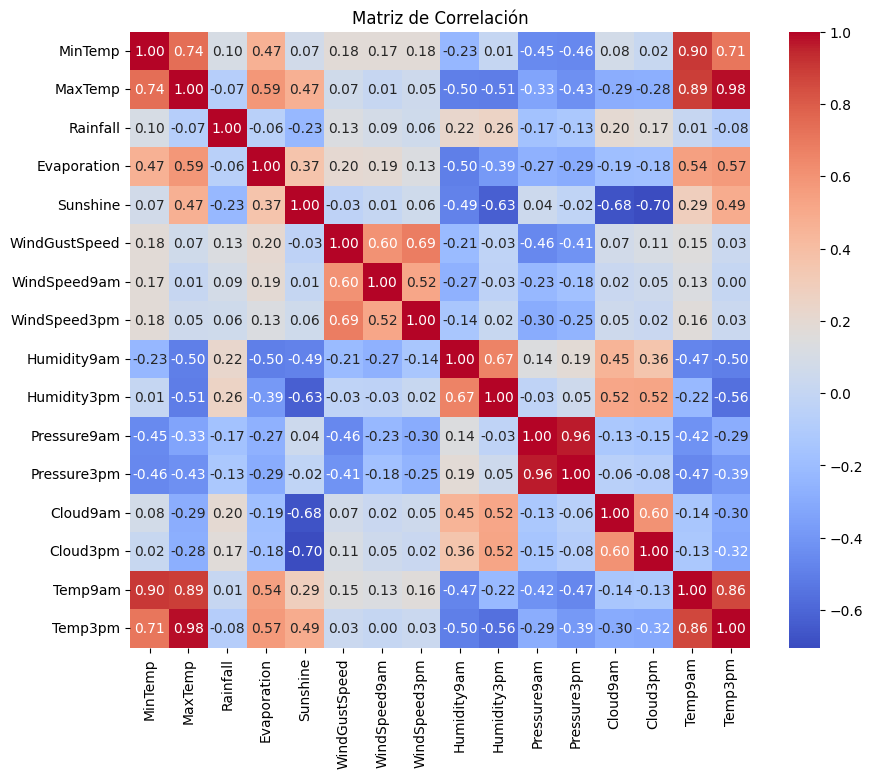

In [21]:
#Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [22]:
#drop any non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['number'])

#Drop rows with missing or infinite values
numeric_df = numeric_df.dropna()
numeric_df = numeric_df[~numeric_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

#add a constant column to calculate the intercept
X = add_constant(numeric_df)

#Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


         Variable           VIF
0           const  39212.282349
1         MinTemp     11.192349
2         MaxTemp     46.996333
3        Rainfall      1.175259
4     Evaporation      2.235333
5        Sunshine      3.363512
6   WindGustSpeed      2.909945
7    WindSpeed9am      1.888114
8    WindSpeed3pm      2.167622
9     Humidity9am      4.445388
10    Humidity3pm      6.832281
11    Pressure9am     20.589958
12    Pressure3pm     20.600760
13       Cloud9am      2.273783
14       Cloud3pm      2.291935
15        Temp9am     25.449072
16        Temp3pm     56.922661
17          Month      1.146916


# Modelos

In [23]:
aus = aus.drop(columns=['Month'])
df_cleaned = aus

In [24]:
df_cleaned.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Logistic Regression

In [25]:
#Clean the data
df_cleaned = df.dropna(subset=['RainTomorrow'])

#Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

#Define features and target
X = df_cleaned.drop(columns=['RainTomorrow'])
y = df_cleaned['RainTomorrow']

#identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#define preprocessing for numerical features
numeric_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#define preprocessing for categorical features
categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#combine preprocessing steps
preprocessor = ColumnTransformer([
    ('numeric', numeric_preprocessor, numerical_features),
    ('categorical', categorical_preprocessor, categorical_features)
])

#define the complete pipeline
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler()),
    ('classifier', LogisticRegression(random_state=42))
])

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict on the test data
y_pred = pipeline.predict(X_test)

#Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy_lr}")
print(f"F1-score: {f1_lr}")


/var/folders/57/c9zjxddn221c056sd800540w0000gn/T/ipykernel_1378/545379000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])


Accuracy: 0.7923257105599961
F1-score: 0.6209449929478138


In [26]:
from sklearn.metrics import classification_report

# Imprimir el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     32210
           1       0.52      0.77      0.62      9201

    accuracy                           0.79     41411
   macro avg       0.72      0.78      0.74     41411
weighted avg       0.83      0.79      0.80     41411



## XGBoost

In [27]:
df_cleaned = pd.read_csv('train-rain.csv')

In [28]:
print(df_cleaned.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [29]:
# Load data and drop rows with missing target values
df_cleaned = df_cleaned.dropna(subset=['RainTomorrow'])

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

# Separate features and target
X = df_cleaned.drop(columns=['RainTomorrow'])  # Features
y = df_cleaned['RainTomorrow']  # Target

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_preprocessor, X.select_dtypes(include=['number']).columns),
    ('categorical', categorical_preprocessor, X.select_dtypes(include=['object']).columns)
])

# Define the XGBoost pipeline
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Define hyperparameters for GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.9, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Split data and train the model using GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')

# Save the best model to a pickle file
with open('Stephanie_Grotewold_x.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 0.7}
Accuracy: 0.8278476733235131
F1-score: 0.6662296924013297


In [30]:
from sklearn.metrics import classification_report

# Imprimir el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     32210
           1       0.59      0.77      0.67      9201

    accuracy                           0.83     41411
   macro avg       0.76      0.81      0.78     41411
weighted avg       0.85      0.83      0.84     41411



## SVM

In [31]:
df_cleaned = df.dropna(subset=['RainTomorrow'])

#Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

#Define features and target
X = df_cleaned.drop(columns=['RainTomorrow'])
y = df_cleaned['RainTomorrow']

#identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#Define preprocessing for numerical features
numeric_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Define preprocessing for categorical features
categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('numeric', numeric_preprocessor, numerical_features),
    ('categorical', categorical_preprocessor, categorical_features)
])

#Define the complete pipeline
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler()),
    ('classifier', SVC(random_state=42))
])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict on the test data
y_pred = pipeline.predict(X_test)

#Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy_svm}")
print(f"F1-score: {f1_svm}")


/var/folders/57/c9zjxddn221c056sd800540w0000gn/T/ipykernel_1378/803283967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])


Accuracy: 0.8244669290768153
F1-score: 0.6655008973356035


In [32]:
from sklearn.metrics import classification_report

# Imprimir el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     32210
           1       0.58      0.79      0.67      9201

    accuracy                           0.82     41411
   macro avg       0.75      0.81      0.77     41411
weighted avg       0.85      0.82      0.83     41411



## Random Forest

In [33]:
# #Clean the data
# df_cleaned = df.dropna(subset=['RainTomorrow'])

# #Encode the target variable
# label_encoder = LabelEncoder()
# df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

# #Define features and target
# X = df_cleaned.drop(columns=['RainTomorrow'])
# y = df_cleaned['RainTomorrow']

# #Identify numerical and categorical features
# numerical_features = X.select_dtypes(include=['number']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# #Define preprocessing for numerical features
# numeric_preprocessor = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# #Define preprocessing for categorical features
# categorical_preprocessor = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# #combine preprocessing steps
# preprocessor = ColumnTransformer([
#     ('numeric', numeric_preprocessor, numerical_features),
#     ('categorical', categorical_preprocessor, categorical_features)
# ])

# #define the complete pipeline
# pipeline = ImblearnPipeline([
#     ('preprocessor', preprocessor),
#     ('oversampler', RandomOverSampler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# #define hyperparameters grid
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 5, 10, 15],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# #Perform GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# #Get the best model
# best_model = grid_search.best_estimator_

# #Predict on the test data
# y_pred = best_model.predict(X_test)

# #Evaluate the model
# accuracy_rf = accuracy_score(y_test, y_pred)
# f1_rf = f1_score(y_test, y_pred, average='binary')

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy_rf}")
# print(f"F1-score: {f1_rf}")


In [34]:
# Clean the data
df_cleaned = df.dropna(subset=['RainTomorrow'])

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])

# Define features and target
X = df_cleaned.drop(columns=['RainTomorrow'])
y = df_cleaned['RainTomorrow']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical features
numeric_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('numeric', numeric_preprocessor, numerical_features),
    ('categorical', categorical_preprocessor, categorical_features)
])

# Define the complete pipeline
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline without GridSearchCV
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy_rf}")
print(f"F1-score: {f1_rf}")


/var/folders/57/c9zjxddn221c056sd800540w0000gn/T/ipykernel_1378/990946512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RainTomorrow'] = label_encoder.fit_transform(df_cleaned['RainTomorrow'])


Accuracy: 0.8541311986090484
F1-score: 0.642774771578107


In [35]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21422
           1       0.71      0.59      0.64      6185

    accuracy                           0.85     27607
   macro avg       0.80      0.76      0.78     27607
weighted avg       0.85      0.85      0.85     27607

